# Obtaining Vacuum Energies and Susceptibilities $\chi$

E_vac: 2.32 ± 0.06
χ: 0.28 ± 0.05


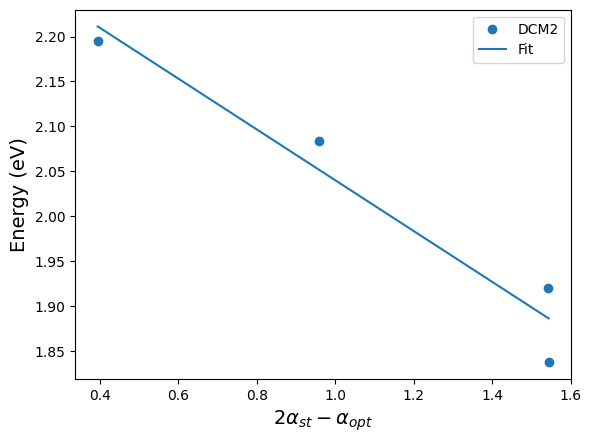

In [26]:
import pandas as pd
import numpy as np
from susc import visualization
import matplotlib.pyplot as plt

def load_data(file):
    data = pd.read_csv(file, skipinitialspace=True)  # trims spaces right after commas
    data.columns = data.columns.str.strip()
    # remove whitespace from every string cell
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    data['epsilon'] = pd.to_numeric(data['epsilon'], errors='coerce')
    data['nr'] = pd.to_numeric(data['nr'], errors='coerce')
    # all numerical values above 100 are considered have to be converted to eV
    for col in data.columns:
        if col not in ['Solvent', 'epsilon', 'nr']:
            data[col] = data[col].apply(lambda x: 1240/float(x) if float(x) > 100 else float(x))
    return data



file = "DCM2.csv"
molecule = "DCM2"
data = load_data(file)


epsilons = data['epsilon'].to_numpy()
nr = data['nr'].to_numpy()
alphas_st = (epsilons - 1)/(epsilons + 1)
alphas_opt = (nr**2 - 1)/(nr**2 + 1)
emission = data[molecule].to_numpy()
opt, cov = visualization.linear_fit((alphas_st,alphas_opt),emission)
chi, e_vac = opt

#print chi and e_vac with uncertainty
err = np.sqrt(np.diag(cov))
print(f"E_vac: {e_vac:.2f} ± {err[1]:.2f}")
print(f"χ: {chi:.2f} ± {err[0]:.2f}")


fig, ax = plt.subplots()

ax.scatter(2*alphas_st - alphas_opt, emission, label=molecule)
ax.plot(2*alphas_st - alphas_opt, e_vac - chi * (2*alphas_st - alphas_opt) , label='Fit')
ax.set_xlabel("$2\\alpha_{st} - \\alpha_{opt}$", fontsize=14)
ax.set_ylabel("Energy (eV)", fontsize=14)
ax.legend()
plt.show()


# Estimating $\epsilon$

In [ ]:
film = "C14%"

def dielectric(film, molecule):
    # filter data for the specific film and molecule
    inference = data[data['epsilon'].isna()]
    emi = inference[inference['Solvent'] == film][molecule].to_numpy()
    nrs = inference[inference['Solvent'] == film]['nr'].to_numpy()
    median, lower, upper = visualization.get_dielectric(emi, (opt,cov), nr=nrs)
    return median, lower, upper

median, lower, upper = dielectric(film, molecule)

#print results
print(f"Film: {film}")
print(f"Median: {median:.2f} [{lower:.2f}, {upper:.2f}]")



Film: C14%
Median: 4.67 [3.94, 5.49]
